In [2]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1 + np.exp(-z))

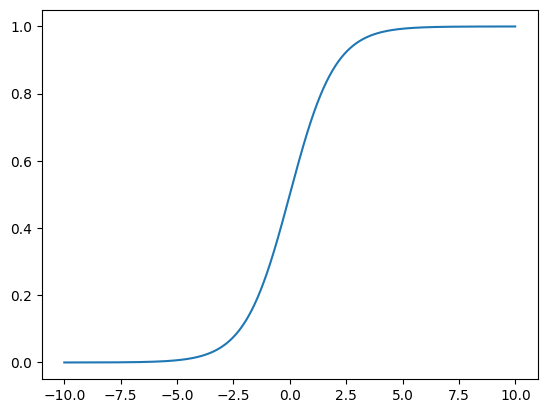

In [3]:
import matplotlib.pyplot as plt

plt.plot(z,g)

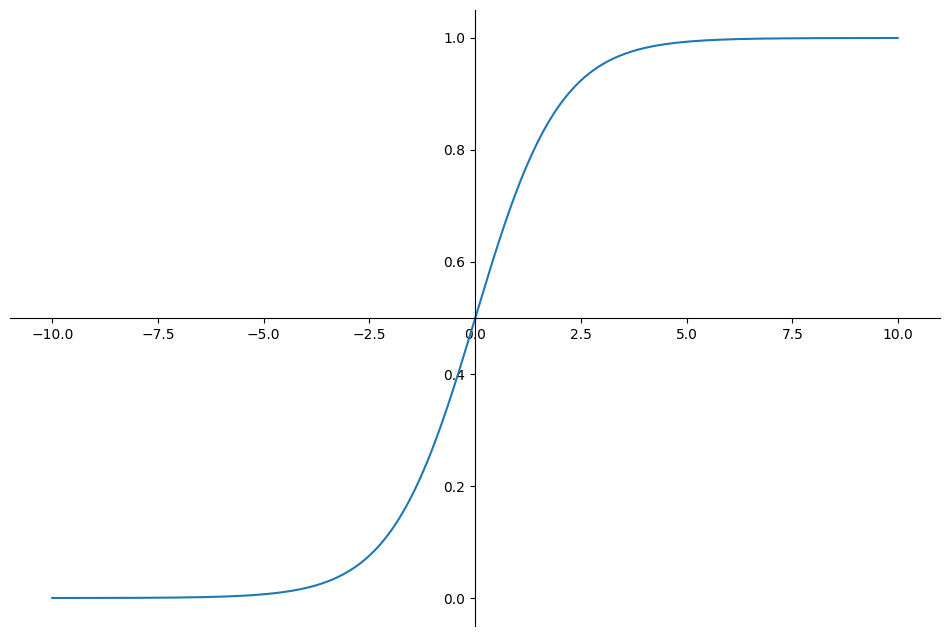

In [4]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(z,g)
ax.spines["left"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_position("center")
ax.spines["top"].set_color("none")

plt.show()


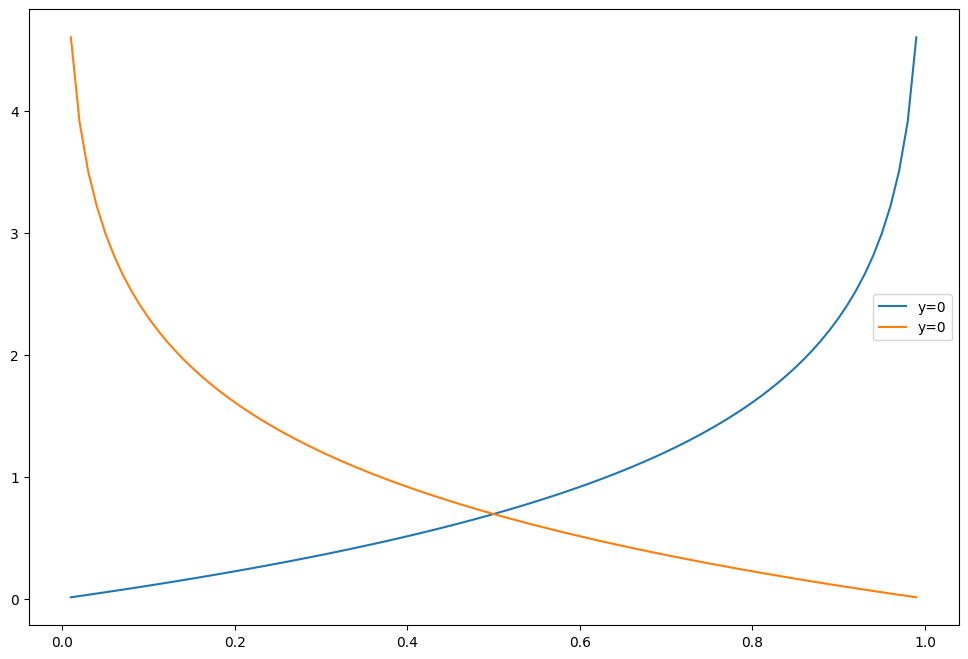

In [6]:
h = np.arange(0.01, 1, 0.01)

c0 = -np.log(1-h)
c1 = -np.log(h)


plt. figure(figsize=(12,8))
plt.plot(h, c0, label="y=0")
plt.plot(h, c1, label="y=0")
plt.legend()
plt.show()


In [13]:
import pandas as pd
red_wine = pd.read_csv("../cv_data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("../cv_data/winequality-white.csv", sep=";")
red_wine["color"] = 1
white_wine["color"] = 0
wine = pd.concat([red_wine, white_wine])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
wine["taste"] = [1. if grade>5 else 0. for grade in wine["quality"]]

X = wine.drop(["taste", "quality"], axis=1)
y = wine["taste"]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver="liblinear", random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)



In [18]:
print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))


0.7427361939580527
0.7438461538461538


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [("scaler", StandardScaler()), ("clf", LogisticRegression(solver="liblinear", random_state=13))]
pipe = Pipeline(estimators)

In [22]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [23]:
y_pred_test = pipe.predict(X_test)
y_pred_tr = pipe.predict(X_train)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))


0.7444679622859341
0.7469230769230769


In [25]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

models = {"logistic regression" :lr, "decision" :wine_tree}#????

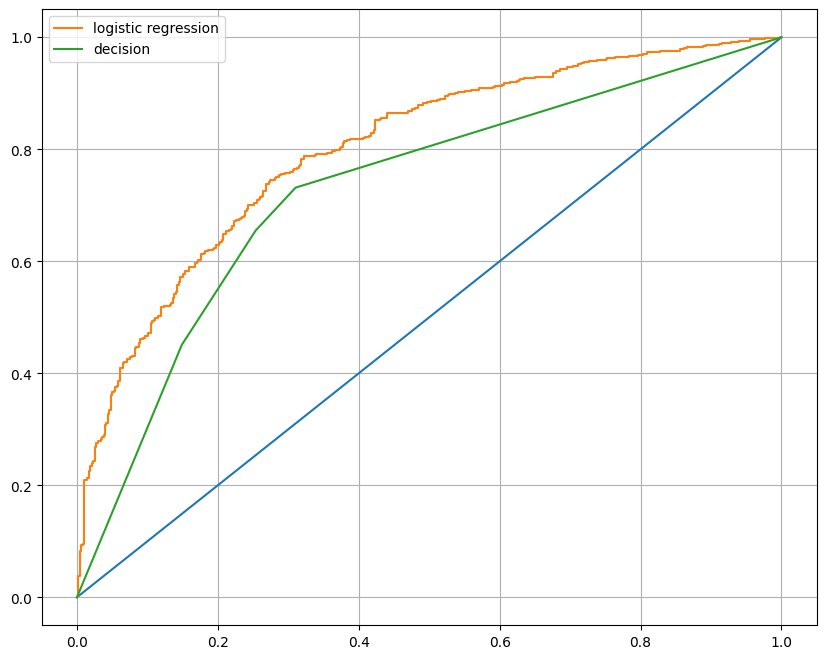

In [27]:
from sklearn.metrics import roc_curve


plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)


plt.grid()
plt.legend()
plt.show()